# Costa Rican Household Poverty Prediction
This is for the Kaggle competition located at: https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data

This project will involve:

1) preliminary analysis

2) Cleaning the Data
]
3) Visualization

4) Modeling

5) Model Interpretation

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

## Preliminary Analysis and Data Loading

In [145]:
train_filepath = "/Users/robertprior/Desktop/ML Projects/Costa Rica Project/train.csv"
test_filepath = "/Users/robertprior/Desktop/ML Projects/Costa Rica Project/test.csv"

In [146]:
#reading in the data
train = pd.read_csv(train_filepath)
test = pd.read_csv(test_filepath)

In [147]:
target = train['Target']

In [148]:
#view the data and all the columns 
pd.set_option('display.max_columns', None) 
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [149]:
#lets look at what type each column is listed as to see where we need to do some cleaning
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


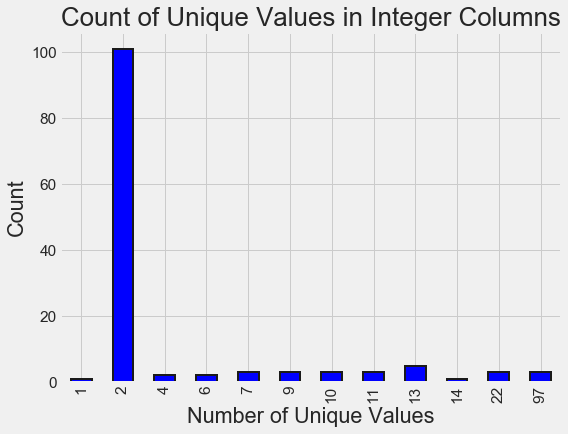

In [150]:
#Let's look at the distribution of unique values through the integer columns
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

From this graph, it looks like most of our data will be booleans which is nice and easy to work with. 

## Cleaning the Data

In [151]:
test['Target'] = np.nan

In [152]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [153]:
test.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


From the info given by kaggle let's see what these are to know how to deal with them
-Id - a unique identifier for each row.
-idhogar - this is a unique identifier for each household.
-dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
-edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
-edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

These 3 columns besides the id columns are what I am most worried about as they are a mixture of words and numbers so I will do these columns last

In [154]:
train.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [155]:
test.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned,Target
0,NaN,NaN,NaN,16.5,1.5,2.25,0.25,272.25,NaN
1,NaN,NaN,NaN,16.5,1.5,2.25,0.25,272.25,NaN
2,NaN,NaN,NaN,16.5,1.5,2.25,0.25,272.25,NaN
3,NaN,1.0,NaN,16.0,1.0,1.00,0.00,256.00,NaN
4,175000.0,1.0,NaN,NaN,0.5,0.25,64.00,NaN,NaN


-v2a1, Monthly rent payment

-v18q1, number of tablets household owns (could possibly be missing from v18q showing no tablet in household)

-rez_esc, Years behind in school

-meaneduc,average years of education for adults (18+)

-overcrowding, # persons per room

-SQBovercrowding, overcrowding squared

-SQBmeaned, square of the mean years of education of adults (>=18) in the household
agesq, Age squared

There are a couple of columns with missing values so lets see which they are and fix them

In [156]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

In [157]:
# lets do an analysis on how many missing values there are for these columns and how much is missing exactly
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head()

,total,percent
rez_esc,7928,0.829549
v18q1,7342,0.768233
v2a1,6860,0.717798
SQBmeaned,5,0.000523
meaneduc,5,0.000523


I want to see what's going on with mean education squared because its missing the same number as mean education.

In [158]:
train_analysis = train.copy()

In [159]:
train_analysis['SQBmeaned'] = train_analysis['SQBmeaned'].fillna(-1).copy()

In [160]:
train_analysis['meaneduc'] = train_analysis['meaneduc'].fillna(-1).copy()

In [161]:
train_analysis.groupby(['SQBmeaned'])['meaneduc'].sum()

SQBmeaned
-1.000000         -5.000000
 0.000000          0.000000
 0.111111          1.000000
 0.250000          9.500000
 0.444444          6.666667
 1.000000         42.000000
 1.777778         16.000001
 2.250000         30.000000
 4.000000        156.000000
 5.444444         48.999999
 6.250000        100.000000
 7.111112         32.000000
 7.562500         24.750000
 9.000000        573.000000
 10.240001        16.000000
 11.111111        76.666666
 12.250000       378.000000
 12.959999        25.199999
 13.444445        58.666667
 14.062500        15.000000
 14.440000        22.800000
 16.000000       824.000000
 17.639997        25.199999
 18.062500        63.750000
 18.777779       195.000008
 20.250000       729.000000
 21.160000        32.199999
 21.777777       111.999996
 22.562500        52.250000
 25.000000       915.000000
                   ...     
 225.000000     2820.000000
 232.562500      137.250000
 235.111100      275.999994
 240.250000     1813.500000
 245.44446

This showed that when meanedu is Nan then so is SQbmeaned. I'm going to fill both these missing values with 0.

features to be filled with 0:

1) v18q1 (since the min value is 1 the missing values are houses with none)

2) rez_esc

3) SQBmeaned

4) meaneduc


I will first fix these and then I will look more into the monthly rent payment feature as to why those are missing. 

In [162]:
train["v18q1"] = train["v18q1"].fillna(0)
test["v18q1"] = test["v18q1"].fillna(0)

train["rez_esc"] = train["rez_esc"].fillna(0)
test["rez_esc"] = test["rez_esc"].fillna(0)

train["meaneduc"] = train["meaneduc"].fillna(0)
test["meaneduc"] = test["meaneduc"].fillna(0)

train["SQBmeaned"] = train["SQBmeaned"].fillna(0)
test["SQBmeaned"] = test["SQBmeaned"].fillna(0)

Let's see if rent being null is tied to if they have paid off their rent

In [163]:
print('1:Owns and Paid Off', '2:Owns and Paying', '3:Rented', '4:Precarious', '5:Other')
own_variables = [x for x in train if x.startswith('tipo')]
for i in own_variables:
    print(train[train[i] == 1]['v2a1'].isnull().sum())

1:Owns and Paid Off 2:Owns and Paying 3:Rented 4:Precarious 5:Other
5911
0
0
163
786


From this, we see that most of the missing values come from the house actually being owned and not being rented out. I'm going to assume that all values that are Nan are meant to be zero too. Let's clean this up a bit so unless they are paying off a mortgage or renting this shoes as zero and then let the "tipo" features explain most of the variation

In [164]:
train['v2a1'] = train['v2a1'].fillna(0)
test['v2a1'] = test['v2a1'].fillna(0)

In [165]:
#lets make sure these are all the missing values
missing = pd.DataFrame(train.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(train)

missing.sort_values('percent', ascending = False).head()

,total,percent
Id,0,0.0
hogar_mayor,0,0.0
parentesco10,0,0.0
parentesco11,0,0.0
parentesco12,0,0.0


In [166]:
#Now lets see which other values shown as strings need to be fixed
train.select_dtypes('float64').head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,0.0,0.0,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,0.0,12.0,1.000000,1.000000,64.0,144.0
2,0.0,0.0,0.0,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,0.0,11.0,1.333333,1.777778,1.0,121.0


#### Moving on to the more complex data cleaning

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

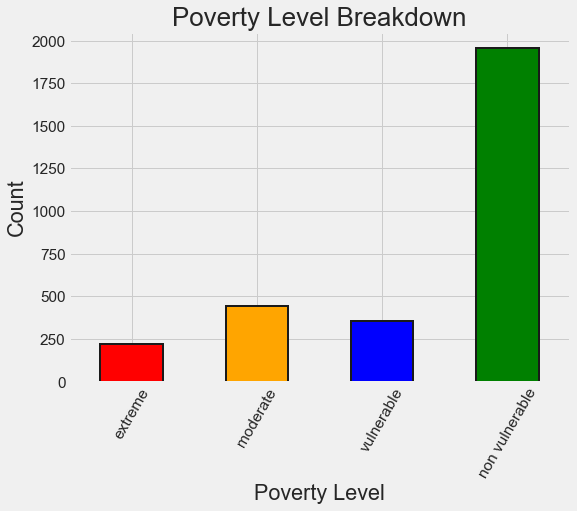

In [167]:
#let's look at the balance of classes for some features that I will pick including: head of household
# Heads of household
heads = train.loc[train['parentesco1'] == 1].copy()

# Labels for training
train_labels = train.loc[(train['Target'].notnull()) & (train['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Color mapping
from collections import OrderedDict
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('Poverty Level'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');

label_counts

So this is obviously very unbalanced with most heads of households being labeled "non vulnerable" or a 4. We will have to be careful that our model doesn't just always pick non vulnerable for some acceptable level of precision.

Now I want to focus on cleaning those 3 features identified as objects to see how we can clean that up

In [168]:
test.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_2f6873615,72958b30c,.5,no,17
1,ID_1c78846d2,72958b30c,.5,no,17
2,ID_e5442cf6a,72958b30c,.5,no,17
3,ID_a8db26a79,5b598fbc9,no,16,no
4,ID_a62966799,1e2fc704e,8,no,11


In [169]:
test['dependency'].value_counts()

yes          5388
no           4289
.5           3678
2            1769
1.5          1758
.33333334    1533
.66666669    1130
8            1037
.25           684
3             596
1.3333334     278
2.5           224
.2            216
.75           203
4             195
.40000001     175
.60000002     128
1.6666666     120
5              96
.16666667      56
1.25           54
.80000001      45
.14285715      32
2.3333333      30
.83333331      22
3.5            18
7              16
.85714287      13
3.3333333      13
2.25           13
.375           11
1.2            11
.2857143        9
.125            9
6               7
Name: dependency, dtype: int64

In [170]:
# Let's start with dependency, from the documentation, it could be possible that dependecy = "no" 
#if there are simply no dependents in the household

In [171]:
train.groupby('dependency')['hogar_nin'].sum()

dependency
.16666667       7
.2             78
.22222222      22
.25           230
.2857143       18
.33333334     510
.40000001     147
.5           1506
.60000002      24
.66666669     889
.71428573      48
.75           273
.80000001      63
.83333331      55
1.2            44
1.25           90
1.3333334     308
1.5          2029
1.6666666      40
1.75           66
2            1532
2.25          117
2.5           378
3             640
3.5           126
4             355
5             114
6              42
8             112
no              0
yes          3580
Name: hogar_nin, dtype: int64

It appears that this is the case as shown by our analysis above. Let's find out about the "yes" values

In [172]:
train.groupby('dependency')['hogar_adul'].sum()

dependency
.16666667      42
.2            462
.22222222      99
.25          1120
.2857143       63
.33333334    1978
.40000001     441
.5           3651
.60000002      40
.66666669    1646
.71428573      96
.75           413
.80000001      99
.83333331      66
1.2            77
1.25           72
1.3333334     280
1.5          1586
1.6666666      24
1.75           55
2            1459
2.25           52
2.5           161
3             400
3.5            36
4             195
5              30
6               7
8             600
no           4630
yes          4896
Name: hogar_adul, dtype: int64

In [173]:
train.groupby('dependency')['hogar_mayor'].sum()

dependency
.16666667      0
.2            12
.22222222      0
.25           40
.2857143       0
.33333334    112
.40000001     21
.5           213
.60000002      0
.66666669    125
.71428573     12
.75           21
.80000001      9
.83333331      0
1.2           22
1.25           0
1.3333334     28
1.5          140
1.6666666      0
1.75          11
2            462
2.25           0
2.5            7
3            140
3.5            0
4             85
5              6
6              0
8            591
no             0
yes          658
Name: hogar_mayor, dtype: int64

Looking at the documentation again and knowing this, it all makes much more sense. No is 0 as in no dependents and yes is 1 dependent for 1 non-dependent in the household. The same follows for the edjefe and edjefa columns so I will fix this all in one chuck of code below:

In [174]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

#let's just make sure it worked
train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


# Visualization

Looks look at some of the correlations to get a better intuitive understanding of our data especially for interpreting the coefficients later. The correlations here shouldn't be too high since the target variable is a categorical rather than a numerical variable.

In [175]:
corr = train.corr()
corr.sort_values(["Target"], ascending = False, inplace = True)
print(corr.Target)

Target             1.000000
meaneduc           0.333932
cielorazo          0.304421
escolari           0.302305
SQBescolari        0.296577
eviv3              0.294222
epared3            0.292451
pisomoscer         0.280284
SQBmeaned          0.276102
paredblolad        0.261274
etecho3            0.257378
SQBedjefe          0.246368
edjefe             0.243215
v18q               0.238864
rooms              0.226208
instlevel8         0.214351
v18q1              0.201754
qmobilephone       0.199707
computer           0.183113
lugar1             0.173359
bedrooms           0.166943
v2a1               0.166942
hogar_adul         0.160133
elimbasu1          0.160051
television         0.157065
energcocinar2      0.156457
tipovivi2          0.143891
estadocivil3       0.129730
refrig             0.126792
age                0.117620
                     ...   
hacapo            -0.138008
etecho2           -0.139205
elimbasu3         -0.140924
SQBhogar_total    -0.143900
r4t3              -0

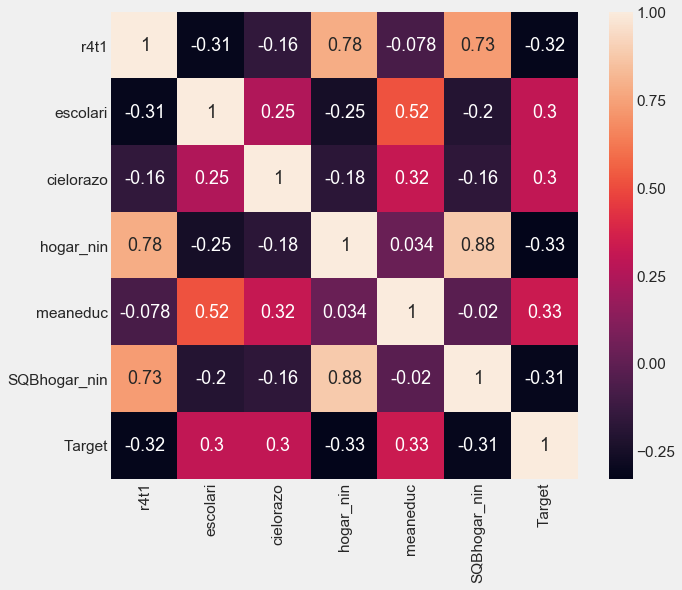

In [176]:
correlation_sp = train.corr()
PovertyLevelCorr = correlation_sp.index[abs(correlation_sp['Target'])>.3]
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(train[PovertyLevelCorr].corr(), square=True, annot=True)

So it looks like mean education, the house having a ceiling, and years of schooling are all positively correlated with being a more secure household. On the other hand, having lots of kids in the household younger than 18 or twelve is more predictive of a household likely to be more in poverty. Let's look into this below to see how many kids fall in a household on average for each target segmentation.

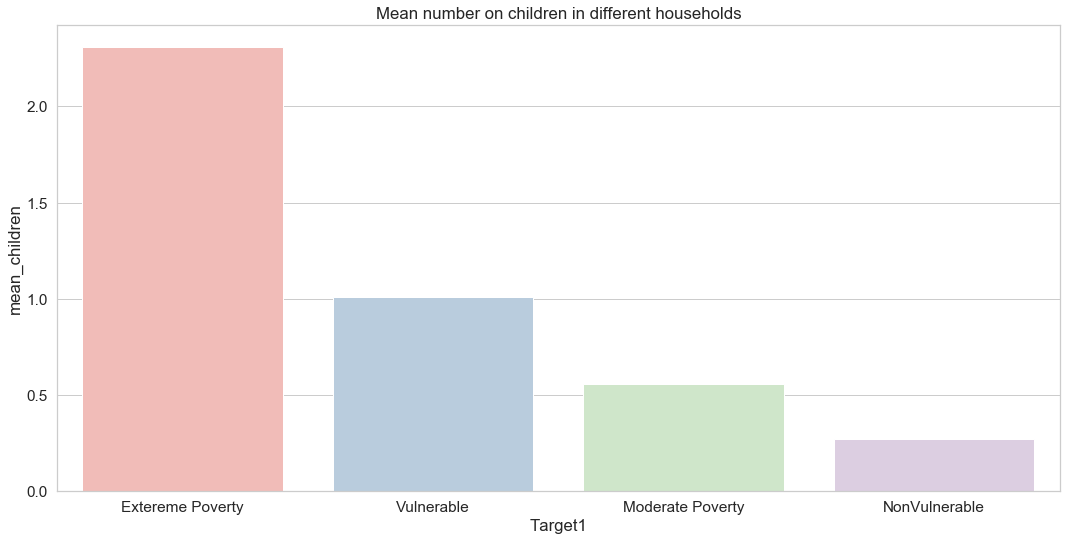

In [177]:
ninos = train.groupby(by = 'Target')['hogar_nin', 'Target'].sum()
ninos = pd.DataFrame(ninos)
ninos['mean_children'] = (ninos['hogar_nin']/ninos['Target'])
ninos['Target1'] = ninos.index.map({4: "NonVulnerable", 3: "Moderate Poverty", 2: "Vulnerable", 1: "Extereme Poverty"})
sns.set(style = 'whitegrid', font_scale=1.4)
fig = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x = 'Target1', y = 'mean_children', data = ninos, palette='Pastel1', ci = None).set_title('Mean number on children in different households')

So it looks like those in extreme poverty have an average of over 2 children per household while nonvulnerable individuals are in a household with 1/4 on average. 


Similar to the analysis above, let's look at rent payment per person by target classification

In [178]:
train['v2a1'].replace(0, np.nan, inplace = True)
train["v2a1"] = train.groupby("Target").transform(lambda x: x.fillna(x.median()))
rpd = pd.DataFrame([train['v2a1']/train['hogar_total'], train['Target']]).T
rpd['Target'] = rpd['Target'].map({4: "NonVulnerable", 3: "Moderate Poverty", 2: "Vulnerable", 1: "Extereme Poverty"})
rpd = rpd.rename(index=str, columns = {"Target":"Target", "Unnamed 0": "Rent Per Person"})
rpd.groupby(by = 'Target').mean()

,Rent Per Person
Target,
Extereme Poverty,22950.190287
Moderate Poverty,27303.554637
NonVulnerable,53333.781743
Vulnerable,25693.910568


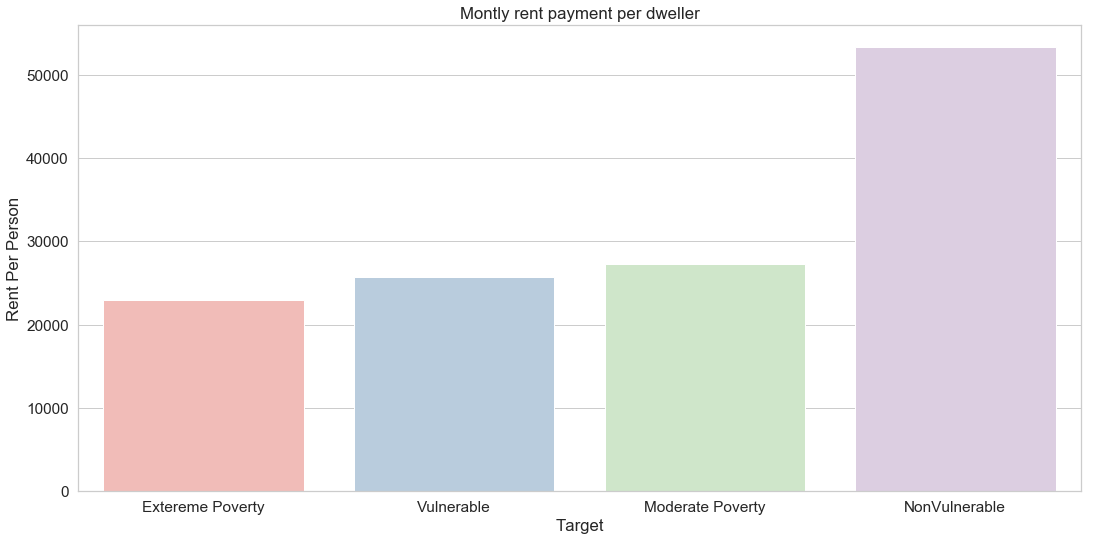

In [179]:
sns.set(style = 'whitegrid', font_scale=1.4)
fig = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x = 'Target', y = 'Rent Per Person', data = rpd, palette='Pastel1',order = ["Extereme Poverty","Vulnerable","Moderate Poverty", "NonVulnerable"], ci = None).set_title('Montly rent payment per dweller')

#### fixing the labels for training
something that was confusing at first is how the data is by individual level but we only only care about those individuals in a household that are the head of household. To make the data consistent, I want every individual in a house to have the same classification of poverty as the head of household as there currently seems to be some errors with this. 

In [180]:
# Let's see for each household if there is more than 1 classiciation assigned to members in that house
# A False symbolizes an error
misclassifications = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print("number of households with misclassifications is {}".format(len(misclassifications) - sum(misclassifications)))

number of households with misclassifications is 85


In [181]:
#lets see if there are any households with no head of household
households_leader = train.groupby('idhogar')['parentesco1'].sum()
print(households_leader[households_leader==0])

idhogar
03c6bdf85    0
09b195e7a    0
1367ab31d    0
1bc617b23    0
374ca5a19    0
61c10e099    0
6b1b2405f    0
896fe6d3e    0
a0812ef17    0
ad687ad89    0
b1f4d89d7    0
bfd5067c2    0
c0c8a5013    0
d363d9183    0
f2bfa75c4    0
Name: parentesco1, dtype: int64


households = train['idhogar'].value_counts()
for i in households:
    focused = train[train['idhogar'] == i]
    head = focused[focused['parentesco1'] == 1]
    true_class = head['Target']
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    for x in focused:
        train[train['idhogar'] == i]['Target'] = true_class

# Feature Engineering & Data Editing
Looking at the data, I don't feel like there needs to be any immediate feature engineering done. Let's focus on editing the data the get it ready for modeling

In [182]:
train = train.drop(['Id', 'idhogar'], axis=1)
test = test.drop(['Id', 'idhogar'], axis=1)

In [183]:
#I want to combine all my data for now for easier manipulation and so the standard scaler works out well
data = train.append(test, ignore_index = True)

In [184]:
#train_labels = np.array(list(data[data['Target'].notnull()]['Target'].astype(np.uint8)))

In [185]:
from sklearn.preprocessing import StandardScaler
#do a try with standard scaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
data = pd.DataFrame(data, columns = train.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [186]:
target.tail()

9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, dtype: int64

# Modeling
1) Random Forest as a baseline
2) Gradient Boosting

I will be using gridsearch to select and tune my hyperparameters for each model

In [187]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
# Peforming Lasso and Ridge Regressions
from sklearn.model_selection import learning_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LinearRegression
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#for our gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter

# Custom scorer for cross validation
scorer_f1 = make_scorer(f1_score, greater_is_better=True, average = 'weighted')
scorer_accuracy = make_scorer(accuracy_score, greater_is_better=True)

In [188]:

# Extract the training data
train = data[data['Target'].notnull()].drop(columns = ['Target'])
test = data[data['Target'].isnull()].drop(columns = ['Target'])


In [189]:
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,1.036157,-0.222268,-1.286957,-0.166756,0.081969,0.202886,-0.558534,-0.478951,-0.579033,-0.560558,-0.824688,-0.575188,-1.824965,-1.735941,-0.752783,-1.613484,-1.745010,-1.741843,-1.665699,0.589470,-0.111431,-1.741843,0.833186,-0.289512,-0.496181,-0.091928,-0.350624,-0.119445,-0.040234,-0.036312,0.665968,-0.547829,-0.039098,-0.019729,-0.120472,-0.253062,-5.798696,7.260761,-0.049296,-0.040605,0.698948,0.196073,-0.182588,-0.069148,0.367306,-0.021193,-0.058253,-0.358274,-0.061032,1.871333,-1.76147,-0.126956,-0.045158,-0.046146,-0.961735,1.058482,-0.218987,0.373628,-0.185802,-0.306012,-0.040234,-0.010942,-0.042058,-0.349547,1.443735,-1.144099,2.615291,-0.657785,-1.152365,2.965748,-0.601171,-1.311757,-0.245819,1.023470,-1.023470,-0.399814,-0.374875,-0.61105,5.268276,-0.252526,-0.185715,-0.716189,1.497257,-0.478830,-0.789463,-0.115783,-0.093894,-0.228862,-0.099874,-0.054789,-0.11391,-0.053679,-0.11337,-0.090258,-1.028064,-1.396046,-0.484133,-1.741843,-0.710782,0.926267,-0.613932,0.202024,-0.38938,-0.457543,-0.512522,2.099198,-0.356570,-0.134764,-0.120727,-0.407985,-0.120472,-1.813103,-0.700934,-1.287776,-0.341952,2.216238,-0.134879,-0.303726,-0.35272,-0.636001,0.153074,-1.260909,0.846347,-0.305954,-0.27442,-0.305661,-0.329591,-0.29145,0.624182,-0.624182,0.396319,0.332958,0.111549,-1.021541,0.593545,-0.561582,-0.408766,-0.316413,-0.011002,0.111549
1,0.549696,-0.222268,-0.628904,-0.166756,0.081969,0.202886,1.790402,0.997767,-0.579033,-0.560558,-0.824688,-0.575188,-1.824965,-1.735941,-0.752783,-1.613484,-1.745010,-1.741843,-1.665699,1.012139,-0.111431,-1.741843,-1.200212,-0.289512,-0.496181,-0.091928,2.852057,-0.119445,-0.040234,-0.036312,-1.501574,-0.547829,-0.039098,-0.019729,-0.120472,3.951597,0.172453,-0.137727,-0.049296,-0.040605,0.698948,0.196073,-0.182588,-0.069148,0.367306,-0.021193,-0.058253,-0.358274,-0.061032,1.871333,-1.76147,-0.126956,-0.045158,-0.046146,1.039788,-0.944750,-0.218987,0.373628,-0.185802,-0.306012,-0.040234,-0.010942,-0.042058,-0.349547,1.443735,-1.144099,-0.382367,1.520253,-1.152365,-0.337183,1.663420,-1.311757,-0.245819,1.023470,-1.023470,-0.399814,-0.374875,-0.61105,5.268276,-0.252526,-0.185715,-0.716189,1.497257,-0.478830,-0.789463,-0.115783,-0.093894,-0.228862,-0.099874,-0.054789,-0.11391,-0.053679,-0.11337,-0.090258,-1.028064,-1.396046,1.173958,-1.741843,4.139985,1.309843,-0.613932,0.688111,-0.38938,-0.457543,-0.512522,-0.476372,-0.356570,-0.134764,-0.120727,2.451073,-0.120472,-1.813103,-0.700934,-1.287776,-0.341952,2.216238,-0.134879,-0.303726,-0.35272,-0.636001,0.153074,-1.260909,0.846347,-0.305954,-0.27442,-0.305661,-0.329591,-0.29145,0.624182,-0.624182,1.503753,0.9048

In [190]:
#let's split the data into a train test split to test accuracy of our model
X_train,X_test,y_train,y_test = train_test_split(train, target, test_size = 0.3,random_state= 42)

### Random Forest
Random Forest is essentially independently run decision trees that will each vote on the classification with majority winning.

In [191]:
clf = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = scorer_f1)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.9484 with std = 0.0064


So it seems like this has actually done very well in comparison to some of the kernels. I will try some other things to see if I can improve the bias

##### f1 scorer
first I will look at using the F1 which is defined as the harmonic mean between precision and recall. This will hopefully account for false negatives better. 

In [192]:
#put together list of things we want to test
param_dictionary = {'max_depth': [4,5], 'n_estimators': [500, 1000]}
clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced')
#don't want accuracy because we have inbalanced classes, n_jobs will give us all the resources
gs = GridSearchCV(clf, param_dictionary, scoring=scorer_f1, verbose=3)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=4, n_estimators=500 ...................................


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, n_estimators=500, score=0.7829465500485558, total=   1.2s
[CV] max_depth=4, n_estimators=500 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=4, n_estimators=500, score=0.7958010941496099, total=   1.0s
[CV] max_depth=4, n_estimators=500 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV]  max_depth=4, n_estimators=500, score=0.7957950210662997, total=   0.8s
[CV] max_depth=4, n_estimators=1000 ..................................
[CV]  max_depth=4, n_estimators=1000, score=0.7879332309364839, total=   1.6s
[CV] max_depth=4, n_estimators=1000 ..................................
[CV]  max_depth=4, n_estimators=1000, score=0.7967821452544408, total=   1.5s
[CV] max_depth=4, n_estimators=1000 ..................................
[CV]  max_depth=4, n_estimators=1000, score=0.7896493605803735, total=   1.5s
[CV] max_depth=5, n_estimators=500 ...................................
[CV]  max_depth=5, n_estimators=500, score=0.8087040964515032, total=   1.0s
[CV] max_depth=5, n_estimators=500 ...................................
[CV]  max_depth=5, n_estimators=500, score=0.8154089318684614, total=   0.8s
[CV] max_depth=5, n_estimators=500 ...................................
[CV]  max_depth=5, n_estimators=500, score=0.8087162542123449, total=   1.0s
[CV] max_depth=5, n_estimators=1

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   18.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 5], 'n_estimators': [500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=weighted), verbose=3)

In [193]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 1000}

In [194]:
gs.cv_results_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.84922115, 1.21250923, 0.73734434, 1.42297403]),
 'std_fit_time': array([0.1131591 , 0.0300379 , 0.03588426, 0.09621501]),
 'mean_score_time': array([0.17316906, 0.30779338, 0.17339563, 0.27373505]),
 'std_score_time': array([0.04626126, 0.00016172, 0.04926058, 0.04761968]),
 'param_max_depth': masked_array(data=[4, 4, 5, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 1000, 500, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 4, 'n_estimators': 500},
  {'max_depth': 4, 'n_estimators': 1000},
  {'max_depth': 5, 'n_estimators': 500},
  {'max_depth': 5, 'n_estimators': 1000}],
 'split0_test_score': array([0.78294655, 0.78793323, 0.8087041 , 0.80390991]),
 'split1_test_score': array([0.79580109, 0.79678215, 0.81540893, 0.8203961 ]),
 'split2_test_score': array([0.79579502, 0.7

It looks like a max depth of 20 led to overfitting by about 0.25 so quite a bit but had a test score of about 0.75. I found a max depth of higher than about 5 was leading to overfitting so I limited my max depth so the train score was only different by about 0.07 or less. Once I had overfitting under control, I increased the n_estimators for better tuning of the model to improve the bias. I ultimately selected n_estimators using gridsearch. I found that increasing from 500 to 1000 estimators provided very little added benefit to my predictions, so I selected 500 estimators as my baseline.  I feel good about this as a beginning model

In [195]:
print("\nClassification Report:")
print(classification_report(y_test, gs.predict(X_test)))


Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.91      0.77       244
           2       0.64      0.51      0.57       472
           3       0.50      0.60      0.54       380
           4       0.94      0.90      0.92      1772

   micro avg       0.80      0.80      0.80      2868
   macro avg       0.69      0.73      0.70      2868
weighted avg       0.81      0.80      0.80      2868



I also used this classification report to compare my results across the score measures and adjust my avg parameter from macro to weighted to improve my scores by about 0.05. Let's look at some different models

##### Accuracy
Lets try those same parameter but using accuracy as the scorer. Accuracy is very basic and the most intuitive in that its the percentage of overall classifications that were correct. 

In [196]:
#put together list of things we want to test
param_dictionary = {'max_depth': [5, 6], 'n_estimators': [500]}
clf = RandomForestClassifier(n_jobs=-1, class_weight='balanced')
#don't want accuracy because we have inbalanced classes, n_jobs will give us all the resources
gs = GridSearchCV(clf, param_dictionary, scoring=scorer_accuracy, verbose=3)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] max_depth=5, n_estimators=500 ...................................


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, n_estimators=500, score=0.8036754818467056, total=   1.0s
[CV] max_depth=5, n_estimators=500 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=5, n_estimators=500, score=0.8120233288470166, total=   1.0s
[CV] max_depth=5, n_estimators=500 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV]  max_depth=5, n_estimators=500, score=0.8102288021534321, total=   1.0s
[CV] max_depth=6, n_estimators=500 ...................................
[CV]  max_depth=6, n_estimators=500, score=0.8247422680412371, total=   1.2s
[CV] max_depth=6, n_estimators=500 ...................................
[CV]  max_depth=6, n_estimators=500, score=0.8245850157021085, total=   1.2s
[CV] max_depth=6, n_estimators=500 ...................................
[CV]  max_depth=6, n_estimators=500, score=0.8232391206819202, total=   1.1s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 6], 'n_estimators': [500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=3)

In [197]:
gs.best_params_

{'max_depth': 6, 'n_estimators': 500}

In [198]:
gs.cv_results_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.79981089, 0.93878166]),
 'std_fit_time': array([0.01597794, 0.05788038]),
 'mean_score_time': array([0.20736297, 0.2081217 ]),
 'std_score_time': array([0.00171619, 0.00103231]),
 'param_max_depth': masked_array(data=[5, 6],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 500],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'n_estimators': 500},
  {'max_depth': 6, 'n_estimators': 500}],
 'split0_test_score': array([0.80367548, 0.82474227]),
 'split1_test_score': array([0.81202333, 0.82458502]),
 'split2_test_score': array([0.8102288 , 0.82323912]),
 'mean_test_score': array([0.80864105, 0.82418897]),
 'std_test_score': array([0.00358832, 0.00067455]),
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_train_score': array([0.84387618, 0.86742934]),
 'split1_train_score': array([0.83295964, 0.86008969])

It looks like our model is performing a lot better with accuracy than with f1. This is probably because it is missing some of the information f1 tells us in regards to falsely predicting. 

Which accuracy, we were able to use a max depth of 6 before there started to be too much variance in the results. This probably ties into what I wrote above. Similar to the F1 model, moving from 500 to 1000 estimators had very marginal benefit.


### Gradient Boosting
This model should hoepfully be a little better than the random forest despite the two being similar. Random Forest takes independent samples and votes for the best model. Gradient Boosting does modeling sequentially in that what was missed on the previous model is weighted for the next model to account for. 

##### F1

In [199]:
clf = GradientBoostingClassifier(n_estimators= 500)
param_dictionary = {"learning_rate": [0.3], 'max_depth': [1,2]}
gs = GridSearchCV(clf, param_dictionary, verbose=3, scoring=scorer_f1)
gs.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] learning_rate=0.3, max_depth=1 ..................................
[CV]  learning_rate=0.3, max_depth=1, score=0.8352522303545384, total=   5.6s
[CV] learning_rate=0.3, max_depth=1 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=1, score=0.8668920123776089, total=   5.5s
[CV] learning_rate=0.3, max_depth=1 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.3s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=1, score=0.8659649242583395, total=   6.0s
[CV] learning_rate=0.3, max_depth=2 ..................................
[CV]  learning_rate=0.3, max_depth=2, score=0.9126706278439307, total=  15.0s
[CV] learning_rate=0.3, max_depth=2 ..................................
[CV]  learning_rate=0.3, max_depth=2, score=0.9310338773761293, total=  14.1s
[CV] learning_rate=0.3, max_depth=2 ..................................
[CV]  learning_rate=0.3, max_depth=2, score=0.935157174271509, total=  13.9s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.3], 'max_depth': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=weighted), verbose=3)

In [200]:
gs.best_params_

{'learning_rate': 0.3, 'max_depth': 2}

In [201]:
gs.cv_results_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([ 5.68617757, 14.29270808]),
 'std_fit_time': array([0.20167481, 0.46646731]),
 'mean_score_time': array([0.02743872, 0.03919792]),
 'std_score_time': array([0.00248113, 0.0003761 ]),
 'param_learning_rate': masked_array(data=[0.3, 0.3],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.3, 'max_depth': 1},
  {'learning_rate': 0.3, 'max_depth': 2}],
 'split0_test_score': array([0.83525223, 0.91267063]),
 'split1_test_score': array([0.86689201, 0.93103388]),
 'split2_test_score': array([0.86596492, 0.93515717]),
 'mean_test_score': array([0.85603017, 0.92628316]),
 'std_test_score': array([0.01470369, 0.0097758 ]),
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_train_score': array([0.89560965, 0.99753002]),
 'split1_train_score': array([0.89488233, 0.99641

In [202]:
print("\nClassification Report:")
print(classification_report(y_test, gs.predict(X_test)))


Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       244
           2       0.83      0.85      0.84       472
           3       0.85      0.76      0.80       380
           4       0.98      0.99      0.98      1772

   micro avg       0.93      0.93      0.93      2868
   macro avg       0.90      0.89      0.89      2868
weighted avg       0.93      0.93      0.93      2868



The classification report showed no increase in score with changing the avg method away from weighted set by the random forest model. I also found that this model was easier to overfit to the data so I had to drastically reduce the max depth to basically 1. This model has helped to decrease some bias in the model however by improve the score by about 0.07. 

##### Accuracy


In [203]:
clf = GradientBoostingClassifier(n_estimators= 1000)
param_dictionary = {"learning_rate": [0.3], 'max_depth': [1,2]}
gs = GridSearchCV(clf, param_dictionary, verbose=3, scoring=scorer_accuracy)
gs.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] learning_rate=0.3, max_depth=1 ..................................
[CV]  learning_rate=0.3, max_depth=1, score=0.8552218735992828, total=  10.9s
[CV] learning_rate=0.3, max_depth=1 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=1, score=0.8739344997756842, total=  10.8s
[CV] learning_rate=0.3, max_depth=1 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.9s remaining:    0.0s


[CV]  learning_rate=0.3, max_depth=1, score=0.8761776581426649, total=  10.7s
[CV] learning_rate=0.3, max_depth=2 ..................................
[CV]  learning_rate=0.3, max_depth=2, score=0.9215598386373823, total=  26.4s
[CV] learning_rate=0.3, max_depth=2 ..................................
[CV]  learning_rate=0.3, max_depth=2, score=0.9358456707043518, total=  26.6s
[CV] learning_rate=0.3, max_depth=2 ..................................
[CV]  learning_rate=0.3, max_depth=2, score=0.9380888290713324, total=  28.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.3], 'max_depth': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=3)

In [204]:
gs.best_params_

{'learning_rate': 0.3, 'max_depth': 2}

In [205]:
gs.cv_results_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([10.74440559, 26.9179887 ]),
 'std_fit_time': array([0.06080223, 0.7360444 ]),
 'mean_score_time': array([0.05531263, 0.07694475]),
 'std_score_time': array([0.00071881, 0.00114097]),
 'param_learning_rate': masked_array(data=[0.3, 0.3],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.3, 'max_depth': 1},
  {'learning_rate': 0.3, 'max_depth': 2}],
 'split0_test_score': array([0.85522187, 0.92155984]),
 'split1_test_score': array([0.8739345 , 0.93584567]),
 'split2_test_score': array([0.87617766, 0.93808883]),
 'mean_test_score': array([0.86844072, 0.93182837]),
 'std_test_score': array([0.00939605, 0.00732169]),
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_train_score': array([0.91251682, 1.        ]),
 'split1_train_score': array([0.91345291, 1.     

Looking at these results, similar to the F1 scoring a max depth of greater than 2 seems to bring some overfitting with gradient boosting. The GridSearch using accuracy seems to lead to the use of the same hyperparameters as F1. 

### Model Evaluation
Let's take a look at how these models perform out of sample with the test set from our train test split and then look at feature importances

In [206]:
clf = GradientBoostingClassifier(n_estimators= 500, learning_rate= 0.3, max_depth= 2, verbose=3)

In [207]:
clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        5686.7733           28.97s
         2        4502.0817           31.07s
         3        3822.8989           29.57s
         4        3387.0320           28.76s
         5        3115.0851           29.75s
         6        2939.6672           28.05s
         7        2810.3257           27.18s
         8        2740.6757           26.18s
         9        2657.7686           26.31s
        10        2597.2776           25.74s
        11        2522.0240           25.17s
        12        2471.4571           24.57s
        13        2421.1025           24.26s
        14        2368.5083           24.20s
        15        2339.7320           24.03s
        16        2309.2702           23.97s
        17        2264.4132           23.61s
        18        2245.2288           23.09s
        19        2221.1263           22.63s
        20        2190.6266           22.57s
        21        2166.6766           22.40s
        2

       187        1016.8049           13.49s
       188        1014.6123           13.47s
       189        1011.0373           13.42s
       190        1006.8315           13.39s
       191        1002.7281           13.34s
       192         998.7388           13.31s
       193         995.9923           13.27s
       194         994.0354           13.22s
       195         989.9671           13.19s
       196         987.6005           13.14s
       197         984.7809           13.08s
       198         981.8707           13.03s
       199         978.9475           12.99s
       200         976.8657           12.95s
       201         971.9450           12.92s
       202         968.6759           12.88s
       203         965.1315           12.84s
       204         960.4179           12.80s
       205         958.1940           12.76s
       206         954.9403           12.73s
       207         953.1354           12.68s
       208         950.3001           12.64s
       209

       373         599.0790            5.47s
       374         597.8501            5.42s
       375         596.3176            5.38s
       376         593.8640            5.34s
       377         592.2484            5.30s
       378         590.3975            5.25s
       379         589.0509            5.21s
       380         587.2339            5.17s
       381         586.2365            5.13s
       382         585.1849            5.08s
       383         584.0422            5.04s
       384         582.3821            5.00s
       385         581.1722            4.96s
       386         580.1462            4.91s
       387         578.2105            4.87s
       388         576.4926            4.82s
       389         575.5172            4.78s
       390         574.1504            4.73s
       391         572.8734            4.69s
       392         570.8902            4.64s
       393         569.8588            4.60s
       394         568.2451            4.56s
       395

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=3, warm_start=False)

In [208]:
clf.score(X_test, y_test)

0.9347977684797768

Using the Gradient Boosting Classifier which performed best in cross validation results and the max depth of 2 we got a score of 0.82. Now I know that max depth had a higher variance and lower bias than the max depth of 1. Let's try a max depth of 1 too to see if decreasing variance will make it perform better out of sample

In [209]:
clf = GradientBoostingClassifier(n_estimators= 500, learning_rate= 0.3, max_depth= 1)

In [210]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [211]:
clf.score(X_test, y_test)

0.8430962343096234

This performed a lot worse, so it looks like the high variance wasn't that much to worry about  in cross validation results. This has me curious that maybe I should try another go with a higher max depth to see if the high variance will still lead to better results out of the training sample

In [212]:
clf = GradientBoostingClassifier(n_estimators= 500, learning_rate= 0.3, max_depth= 4)

In [213]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [214]:
clf.score(X_test, y_test)

0.9592050209205021

It looks like this has actually done really well. There could have been something funky going on with our X_test sample that was leading to high variance with a higher max depth. I don't wan't to raise the max depth above 4 though as I may put the model of serious risk of overfitting to our test data and then not be good really out of sample. I would feel good about it though because the max depth of 2 model only performed slightly worse. Let's look at our coefficients on this model next

In [70]:
sorted(list(zip(train.columns, clf.feature_importances_)), key=lambda x: abs(x[1]))

[('elimbasu5', 0.0),
 ('instlevel9', 3.8352710315120506e-09),
 ('parentesco10', 6.360037376421226e-06),
 ('techootro', 1.0716531875479542e-05),
 ('pisoother', 4.090285755863708e-05),
 ('planpri', 8.483966289182584e-05),
 ('parentesco5', 9.272292356329612e-05),
 ('parentesco7', 0.00011986055518530744),
 ('paredfibras', 0.0001925487626399596),
 ('pisonatur', 0.0002056445413799353),
 ('parentesco8', 0.00022749065816259184),
 ('instlevel1', 0.0002682720195996588),
 ('parentesco11', 0.0002697992280557066),
 ('estadocivil1', 0.00029933392091423727),
 ('elimbasu6', 0.000299494661148527),
 ('female', 0.00030522915110980367),
 ('male', 0.00031726941311254825),
 ('parentesco1', 0.00032927238848949836),
 ('pisonotiene', 0.0003357321253132616),
 ('instlevel8', 0.0005063335119436588),
 ('parentesco2', 0.0005807398974211007),
 ('elimbasu4', 0.000586239927928914),
 ('parentesco3', 0.000594552425811895),
 ('sanitario1', 0.0006006123077530804),
 ('noelec', 0.0006674034807256627),
 ('parentesco6', 0.000

We can't determine the way that these features are affecting the classification as this only tells us which features are important in our model. Let's plot these values for relative comparison

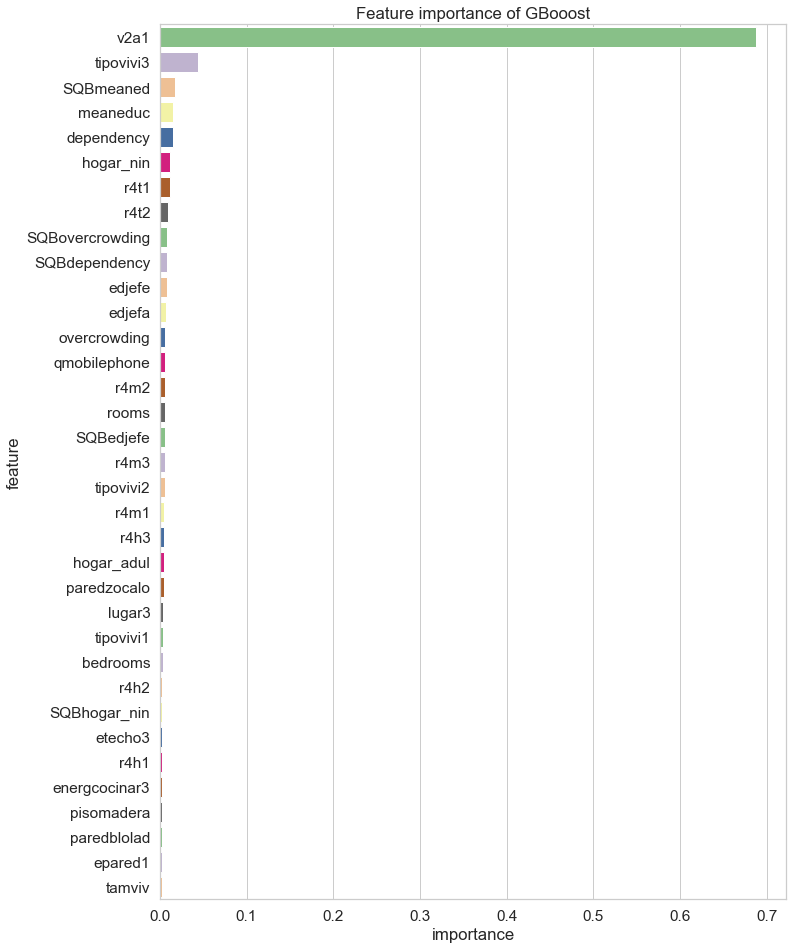

In [215]:
gb_fimp=pd.DataFrame(sorted(list(zip(train.columns, clf.feature_importances_)), key=lambda x: abs(x[1])),columns=['feature','importance']).sort_values('importance', ascending=False)
gb_fimp1 = gb_fimp.iloc[0:35]

sns.set(style = 'whitegrid', font_scale=1.4)
fig = plt.subplots(figsize=(10, 15))
ax = sns.barplot(x = 'importance', y = 'feature', data = gb_fimp1,palette='Accent', ci = None).set_title('Feature importance of GBooost')

So it looks like our model is heavily weighting V2a1. It may be important to improve the accuracy of the model to go back and find a better way to segment these values possibly for better feeding into the model. 

Overall I feel my final model was very useful. I would not recommend it in its current state since it is weighting monthly rent so heavily. I would recommend this model as a guide for the company but definitely not as an independent system yet. I think obtaining more data would be very important for improving the usefulness and trustworthiness of the model. Currently we have been very constrained in that the max depth can only be about 2 or 3 before the risk of overfitting kicks in. More data would help avoid such overfitting, especially with our more complex model. This model would not probably perform well on edge cases at the current moment. Young couples with no kids may not be as well accounted for in the model because their rent is uncertain but don't have any kids which is also correlated with bbeing labeled as more stable. Fixing this would involve incorporating more data covering this demographic. 